In [172]:
import dolfin as df
import matplotlib.pyplot as plt

import mshr

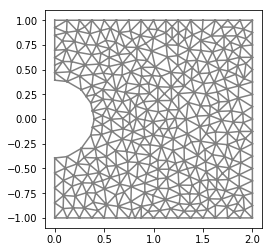

In [84]:
# Geometry and Mesh
tube_radius = .4

domain = mshr.Rectangle(df.Point(0., -1.), df.Point(2., 1.))\
        - mshr.Circle(df.Point(0.0, 0.0), tube_radius)

mesh = mshr.generate_mesh(domain, 15)

df.plot(mesh);

In [85]:
# Define Dirichlet boundary (x = 0 or x = 1)
def boundary_surf(x):
    return x[1] > 1.0 - df.DOLFIN_EPS

def boundary_tube(x):
    return x[0]*x[0] + x[1]*x[1] < tube_radius**2 + df.DOLFIN_EPS

In [93]:
V = df.FunctionSpace(mesh, "Lagrange", 1)

In [94]:
# Define boundary condition
u_surf = df.Constant(0.0)
bc_surf = df.DirichletBC(V, u_surf, boundary_surf)

u_tube = df.Constant(10.0)
bc_tube = df.DirichletBC(V, u_tube, boundary_tube)

In [95]:
# Define variational problem
u = df.TrialFunction(V)
v = df.TestFunction(V)
f = df.Constant(.0)
a = df.inner(df.grad(u), df.grad(v))*df.dx
L = f*v*df.dx # + g*v*ds

In [96]:
# Compute solution
u = df.Function(V)
df.solve(a == L, u, [bc_surf, bc_tube])

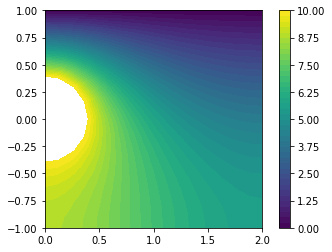

In [97]:
ax = df.plot(u, colorbar='on');
plt.colorbar(ax);

In [98]:
df.grad(u)

In [103]:
boundary_parts = df.MeshFunction("size_t", mesh, mesh.topology().dim()-1)

In [165]:
aa = df.assemble( df.Constant(1.)*v*df.ds, bc=boundary_tube )

TypeError: assemble() got an unexpected keyword argument 'bc'

In [156]:
aa.size()

378

In [158]:
aaa = aa.get_local()

In [159]:
aaa.shape

(378,)

In [161]:
aaa.sum()

8.4597230240826953

In [163]:
2*4 - 2*tube_radius + df.pi*tube_radius

8.456637061435917

In [171]:
df.ds['e']

Notation dx[meshfunction] is deprecated. Please use dx(subdomain_data=meshfunction) instead.


Measure('exterior_facet', subdomain_id='everywhere', subdomain_data='e')